<a href="https://colab.research.google.com/github/DylanMontoya/llm-rag-workshop/blob/main/DALL_E_V2X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
%%capture
!pip install openai

In [21]:
from google.colab import userdata

OPENAI_KEY = userdata.get('OPENAI_KEY')

In [22]:
from openai import OpenAI
import requests
import os
from PIL import Image

client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", OPENAI_KEY))

In [23]:
# set a directory to save DALL·E images to
image_dir_name = "images"
image_dir = os.path.join(os.curdir, image_dir_name)

# create the directory if it doesn't yet exist
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

print(f"{image_dir=}")


image_dir='./images'


In [24]:
# set the prompt
prompt = """
**system_message:**
Eres un generador de imágenes basado en inteligencia artificial. Tu tarea es crear una imagen detallada y visualmente atractiva basada en la descripción proporcionada.

**assistant_message:**
Voy a generar una imagen que represente la tecnología V2X (Vehicle-to-Everything). Por favor, proporciona los detalles que te gustaría que incluya la imagen.

**user_message:**
Quiero una imagen que represente la tecnología V2X (Vehicle-to-Everything). La imagen debe incluir los siguientes elementos:
1. Un vehículo conectado.
2. Un semáforo inteligente.
3. Comunicación entre el vehículo y el semáforo.
4. Una señal de tráfico conectada.
5. Un edificio inteligente que también esté conectado.
6. Elementos visuales que representen la comunicación de datos, como ondas o señales.

La imagen debe mostrar un entorno urbano moderno, con un cielo despejado y un ambiente tecnológico avanzado. Los colores deben ser vibrantes pero realistas, y la escena debe transmitir la idea de una ciudad inteligente y conectada.

**assistant_message:**
Aquí tienes la descripción de la imagen para generar con DALL-E 3:

Una imagen que muestra un entorno urbano moderno y tecnológico, con un cielo despejado. En el centro de la imagen, hay un vehículo conectado, con luces LED y antenas visibles que indican su capacidad de comunicación. A la derecha del vehículo, se encuentra un semáforo inteligente, equipado con sensores y cámaras, que está en comunicación directa con el vehículo. Esta comunicación se representa mediante ondas de señal azules fluyendo entre el semáforo y el coche.

A la izquierda del vehículo, hay una señal de tráfico conectada, interactuando con el coche a través de ondas de señal similares. En el fondo, un edificio inteligente, equipado con paneles solares y antenas, forma parte de esta red de comunicación, mostrando cómo los edificios también están conectados en el ecosistema V2X.

La imagen utiliza colores vibrantes pero realistas, con un enfoque en tonos azules y verdes para resaltar la tecnología y la conexión. El ambiente es futurista, limpio y avanzado, transmitiendo la idea de una ciudad inteligente y completamente conectada.
"""

In [25]:
# call the OpenAI API
generation_response = client.images.generate(
    model = "dall-e-3",
    prompt=prompt,
    n=1,
    size="1024x1024",
    response_format="url",
)

# print response
print(generation_response)

ImagesResponse(created=1718721063, data=[Image(b64_json=None, revised_prompt="An image displaying a modern, technologically advanced urban environment under a clear sky. At the center of the image, there's a connected vehicle with visible LED lights and antennas indicating its communication ability. To the vehicle's right stands an intelligent traffic light, equipped with sensors and cameras, conducting a direct communication with the vehicle, represented by blue signal waves flowing between them. To the vehicle's left, there's a connected traffic sign interacting with the car via similar signal waves. In the background, an intelligent building fitted with solar panels and antennas is part of this communication network, showing how buildings too are interconnected within the V2X ecosystem. The picture uses vibrant yet realistic colors, with a focus on blue and green tones to highlight the technology and connection. The overall atmosphere is futuristic, clean, and advanced, conveying th

In [26]:
# save the image
generated_image_name = "generated_image.png"  # any name you like; the filetype should be .png
generated_image_filepath = os.path.join(image_dir, generated_image_name)
generated_image_url = generation_response.data[0].url  # extract image URL from response
generated_image = requests.get(generated_image_url).content  # download the image

with open(generated_image_filepath, "wb") as image_file:
    image_file.write(generated_image)  # write the image to the file

./images/generated_image.png


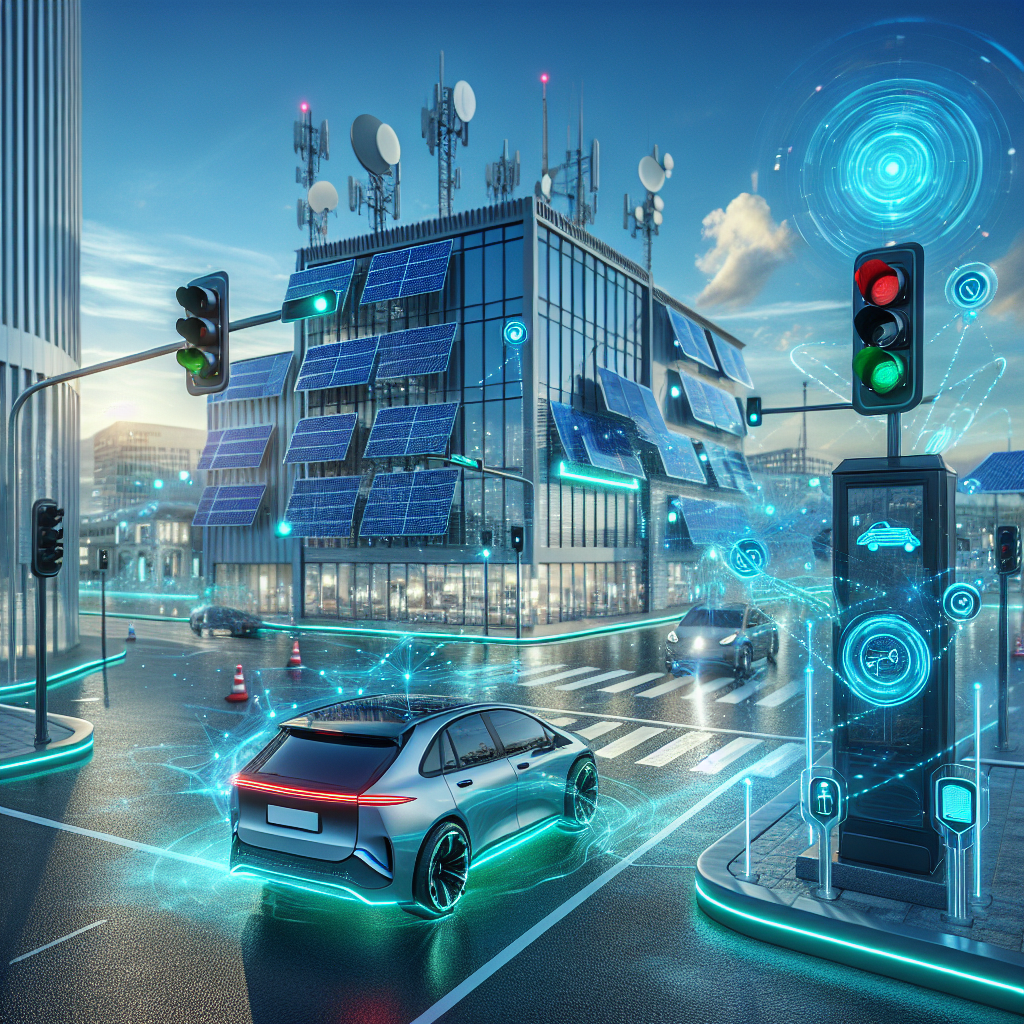

In [27]:
# print the image
print(generated_image_filepath)
display(Image.open(generated_image_filepath))